In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import sqrtm

# Punto 5

## a) Genere 5000 vectores 2-dimensionales con media cero y varianza $I_2$. Grafique los puntos en el plano (usted debería ver que los puntos indican una PDF circular).

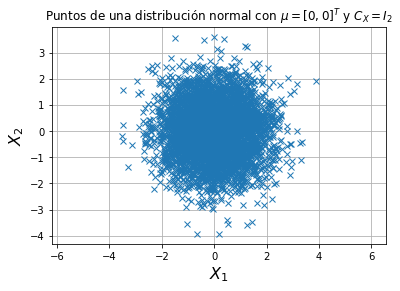

In [2]:
mux = np.array([0, 0])
Cx = np.eye(2)

X = np.random.multivariate_normal(mux, Cx, 5000)

plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.grid()
plt.title(r'Puntos de una distribución normal con $\mu = [0, 0]^T$ y $C_X = I_2$')
plt.xlabel(r'$X_1$', fontsize=16)
plt.ylabel(r'$X_2$', fontsize=16)
plt.show()

## b) Se desea transformar $X$ en un vector aleatorio Gaussiano $Y = AX + b$ tal que $$Y \sim N\left(\begin{bmatrix} 3 \\ -4 \end{bmatrix}, \begin{bmatrix} 2 & -1 \\ -1 & 9 \end{bmatrix}\right)$$ Encuentre el valor de $A$ y $b$ para hacer esto. Utilice el concepto de una matriz obtenida a partir de la factorización usando valores y vectores propios.

In [3]:
muy = np.array([3, -4])
Cy = np.array([[2, -1], [-1, 9]])

# Sabemos que Cy = ACxA^T, luego A = Cy^{1/2}

# Valores y vectores propios de Cy (ya salen normalizados)
valsCy, vectsCy = np.linalg.eig(Cy)

# Se crea matriz Lambda con los valores propios
LambdaCy = np.array([[valsCy[0], 0], [0, valsCy[1]]])

# Se crea la matriz A, con A = Cy^1/2
A = np.matmul(np.matmul(vectsCy, np.sqrt(LambdaCy)), vectsCy.T)
print(f'Matriz A calculada con la fórmula: \n {A}')
A2 = sqrtm(Cy)
print(f'\nMatriz A calculada con función sqrtm: \n {A2}')

Cy_test = np.matmul(np.matmul(A, Cx), A.T)
print(f'\nSe confirma el valor de\nCy = ACxA^T = \n {Cy_test}')

b = np.asarray(np.matrix(muy)).T
print(f'\nPara garantizar que Y tenga media en [3, -4]^T, se escoge\nb = \n {b}')
print('pues la media de X se encontraba en [0, 0]^T')

Matriz A calculada con la fórmula: 
 [[ 1.39572265 -0.22794359]
 [-0.22794359  2.99132775]]

Matriz A calculada con función sqrtm: 
 [[ 1.39572265 -0.22794359]
 [-0.22794359  2.99132775]]

Se confirma el valor de
Cy = ACxA^T = 
 [[ 2. -1.]
 [-1.  9.]]

Para garantizar que Y tenga media en [3, -4]^T, se escoge
b = 
 [[ 3]
 [-4]]
pues la media de X se encontraba en [0, 0]^T


## c) Genere 5000 muestras de $Y$ a partir de las muestras de $X$, utilizando $A$ y $b$ (en un plano). No puede utilizar una función predefinida para generar estos puntos. Sólo a partir de las observaciones de X. Grafique estas nuevas muestras. ¿Esta gráfica tiene sentido?

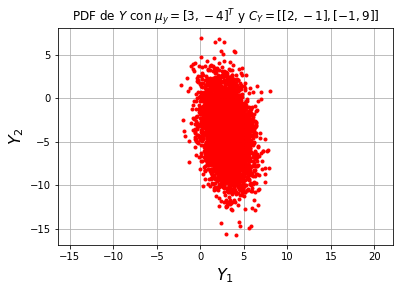

In [4]:
Y = np.zeros((5000, 2))

for i in range(len(Y)):
    Y[i] = (np.matmul(A, np.asarray(np.matrix(X[i])).T) + b).T

plt.plot(Y[:,0], Y[:,1], '.', color='red')
plt.axis('equal')
plt.grid()
plt.title(r'PDF de $Y$ con $\mu_y = [3, -4]^T$ y $C_Y = [[2, -1], [-1, 9]]$')
plt.xlabel(r'$Y_1$', fontsize=16)
plt.ylabel(r'$Y_2$', fontsize=16)
plt.show()

Esta gráfica tiene sentido porque se puede notar que la distribución de los datos está centrada en $[3, -4]$, y además se puede notar que la forma de la distribución a lo largo del eje $Y_1$ es pequeña (el óvalo tiene un ancho pequeño), debido a la pequeña varianza de la variable $Y_1$, que es igual a 2.

Mientras tanto, se puede notar que la forma de la distribución a lo largo del eje $Y_2$ es grande (el óvalo es bien alargado), y esto se debe a la varianza de la variable $Y_2$, que es igual a 9 y por lo tanto es más grande que la varianza de la variable $Y_1$. 

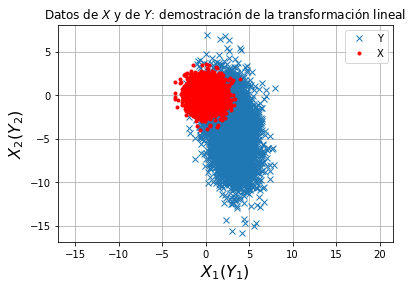

In [5]:
plt.plot(Y[:,0], Y[:,1], 'x')
plt.plot(X[:,0], X[:,1], '.', color='red')
plt.axis('equal')
plt.grid()
plt.title(r'Datos de $X$ y de $Y$: demostración de la transformación lineal')
plt.legend(labels=["Y", "X"])
plt.xlabel(r'$X_1 (Y_1)$', fontsize=16)
plt.ylabel(r'$X_2 (Y_2)$', fontsize=16)
plt.show()

## d) Encuentre teóricamente el PDF de la primera coordenada de $Y$ y el PDF de la segunda coordenada de $Y$ (llámelas $Y_1$ y $Y_2$). Grafique el histograma de $Y_1$ y $Y_2$ utilizando las 5000 muestras del enunciado anterior, y traslápelo con la gráfica de las PDF verdaderas correspondientes (es decir, las PDFs calculadas teóricamente).

Text(0, 0.5, 'Frecuencia')

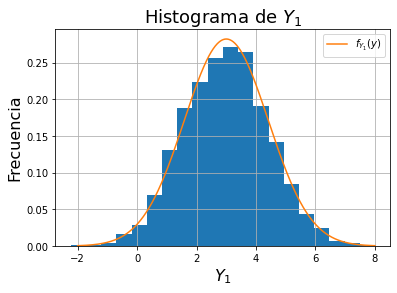

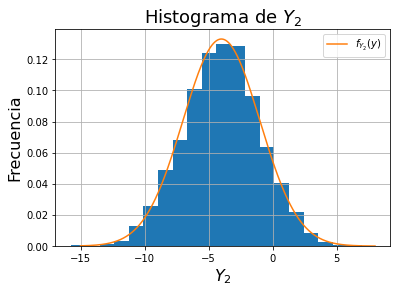

In [6]:
def Y1(y1, muy1, vary1):
    return (1/(np.sqrt(2*np.pi*vary1)))*np.exp(-0.5*(y1-muy1)**2/(vary1))

def Y2(y2, muy2, vary2):
    return (1/(np.sqrt(2*np.pi*vary2)))*np.exp(-0.5*(y2-muy2)**2/(vary2))

size = 5000
y1 = np.linspace(-2, 8, size)
y2 = np.linspace(-15, 8, size)

Y1_vec = np.zeros((len(y1), 1))
Y2_vec = np.zeros((len(y2), 1))

muy1 = 3
muy2 = -4

vary1 = 2
vary2 = 9

for i in range(size):
    Y1_vec[i] = Y1(y1[i], muy1, vary1)
    Y2_vec[i] = Y2(y2[i], muy2, vary2)

plt.figure()
m, bins, patches = plt.hist(Y[:,0], 20, density=True)
plt.plot(y1, Y1_vec)
plt.grid()
plt.legend(labels=[r'$f_{Y_1}(y)$'])
plt.title(r'Histograma de $Y_1$', fontsize=18)
plt.xlabel(r'$Y_1$', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)

plt.figure()
m, bins, patches = plt.hist(Y[:,1], 20, density=True)
plt.plot(y2, Y2_vec)
plt.grid()
plt.legend(labels=[r'$f_{Y_2}(y)$'])
plt.title(r'Histograma de $Y_2$', fontsize=18)
plt.xlabel(r'$Y_2$', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)